In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv('alturas-pesos-train.csv')

In [4]:
df.head()

,Genero,Peso,Altura
0,Mujer,60,160
1,Hombre,95,180
2,Hombre,75,170
3,Mujer,55,160
4,Mujer,55,150


# Cual es la estimación de la probabilidad de que pese 65 y mida 165?

In [5]:
# contamos todas las personas que pesan 65kg y miden 165cm
frec_65_165 = ((df['Peso'] == 65) & (df['Altura'] == 165)).sum()
print(frec_65_165)

402


In [6]:
P_peso_65_alt_165 = frec_65_165/len(df)
print(P_peso_65_alt_165)

0.05025


Formalmente, si $X_1$ es el peso y $X_2$ es la altura

$P(X_1 = 65, X_2 = 165) = 0.05025 $

# Estimación de la conjunta

In [34]:
# Todos los pares de valores de Peso y Altura
df[['Peso', 'Altura']].values

array([[ 60, 160],
       [ 95, 180],
       [ 75, 170],
       ...,
       [ 75, 170],
       [ 65, 165],
       [ 80, 170]])

In [35]:
# Genero lista con tuplas que consisten en pares de valores peso, altura
tuplas = []
for line in df[['Peso', 'Altura']].values:
    tuplas.append(tuple(line))

In [9]:
print(tuplas)

[(60, 160), (95, 180), (75, 170), (55, 160), (55, 150), (60, 160), (80, 175), (70, 170), (55, 155), (85, 180), (60, 165), (80, 165), (95, 185), (75, 165), (65, 170), (85, 180), (65, 160), (40, 150), (40, 145), (70, 160), (60, 160), (60, 160), (65, 165), (85, 170), (75, 165), (95, 180), (85, 165), (55, 155), (55, 155), (50, 155), (90, 175), (75, 170), (30, 145), (45, 150), (65, 170), (65, 165), (80, 175), (70, 170), (60, 155), (65, 165), (55, 155), (75, 170), (90, 170), (65, 160), (55, 160), (65, 165), (60, 155), (85, 180), (90, 180), (70, 170), (65, 165), (80, 175), (55, 160), (110, 195), (60, 155), (55, 155), (90, 170), (70, 170), (50, 155), (55, 155), (85, 185), (65, 160), (65, 155), (50, 155), (80, 175), (95, 180), (70, 170), (75, 165), (65, 170), (50, 155), (85, 175), (85, 170), (70, 165), (65, 170), (55, 155), (90, 180), (70, 170), (90, 175), (60, 170), (95, 180), (60, 150), (90, 190), (80, 175), (65, 165), (80, 175), (95, 180), (85, 170), (85, 175), (85, 175), (60, 165), (65, 160

In [10]:
from collections import Counter
Counter(tuplas).most_common(20)

[((60, 160), 453),
 ((85, 175), 408),
 ((65, 165), 402),
 ((75, 170), 394),
 ((80, 170), 369),
 ((80, 175), 351),
 ((70, 165), 337),
 ((90, 180), 335),
 ((65, 160), 305),
 ((55, 155), 302),
 ((70, 170), 279),
 ((55, 160), 272),
 ((90, 175), 262),
 ((85, 180), 239),
 ((60, 165), 235),
 ((75, 165), 209),
 ((50, 155), 208),
 ((95, 180), 201),
 ((60, 155), 179),
 ((85, 170), 176)]

In [11]:
# La frecuencia conjunta será el recuento de la cantidad de pares de valores iguales
frecuencia_conjunta = dict(Counter(tuplas))
frecuencia_conjunta

{(60, 160): 453,
 (95, 180): 201,
 (75, 170): 394,
 (55, 160): 272,
 (55, 150): 59,
 (80, 175): 351,
 (70, 170): 279,
 (55, 155): 302,
 (85, 180): 239,
 (60, 165): 235,
 (80, 165): 98,
 (95, 185): 153,
 (75, 165): 209,
 (65, 170): 128,
 (65, 160): 305,
 (40, 150): 16,
 (40, 145): 22,
 (70, 160): 108,
 (65, 165): 402,
 (85, 170): 176,
 (85, 165): 23,
 (50, 155): 208,
 (90, 175): 262,
 (30, 145): 1,
 (45, 150): 93,
 (60, 155): 179,
 (90, 170): 36,
 (90, 180): 335,
 (110, 195): 11,
 (85, 185): 30,
 (65, 155): 55,
 (85, 175): 408,
 (70, 165): 337,
 (60, 170): 31,
 (60, 150): 16,
 (90, 190): 5,
 (100, 185): 97,
 (45, 155): 46,
 (50, 150): 133,
 (105, 185): 18,
 (80, 170): 369,
 (35, 145): 3,
 (95, 175): 58,
 (50, 160): 60,
 (75, 175): 134,
 (100, 190): 48,
 (75, 160): 42,
 (55, 165): 69,
 (95, 190): 38,
 (70, 175): 44,
 (55, 145): 4,
 (90, 185): 119,
 (105, 195): 13,
 (50, 145): 16,
 (100, 175): 9,
 (80, 180): 63,
 (100, 180): 33,
 (45, 145): 33,
 (110, 190): 8,
 (115, 200): 2,
 (45, 160): 

## Espacio muestral

Todas las combinaciones de pares de valores (Peso, Altura)

In [12]:
frecuencia_conjunta.keys()

dict_keys([(60, 160), (95, 180), (75, 170), (55, 160), (55, 150), (80, 175), (70, 170), (55, 155), (85, 180), (60, 165), (80, 165), (95, 185), (75, 165), (65, 170), (65, 160), (40, 150), (40, 145), (70, 160), (65, 165), (85, 170), (85, 165), (50, 155), (90, 175), (30, 145), (45, 150), (60, 155), (90, 170), (90, 180), (110, 195), (85, 185), (65, 155), (85, 175), (70, 165), (60, 170), (60, 150), (90, 190), (100, 185), (45, 155), (50, 150), (105, 185), (80, 170), (35, 145), (95, 175), (50, 160), (75, 175), (100, 190), (75, 160), (55, 165), (95, 190), (70, 175), (55, 145), (90, 185), (105, 195), (50, 145), (100, 175), (80, 180), (100, 180), (45, 145), (110, 190), (115, 200), (45, 160), (105, 190), (65, 175), (70, 155), (40, 140), (30, 140), (100, 195), (115, 195), (75, 180), (40, 160), (65, 150), (55, 170), (80, 185), (80, 160), (50, 165), (40, 155), (35, 140), (85, 160), (105, 200), (45, 140), (35, 155), (120, 200), (105, 180), (95, 195), (110, 200), (115, 190), (70, 180), (75, 155)])

# Probabilidad Conjunta

In [36]:
# La probabilidad conjunta es la cantidad de un determinado par de valores sobre la cantidad total de datos
conjunta_prob = {al:c/len(df) for al, c in frecuencia_conjunta.items()}

In [14]:
# Primer verificicación de que hicimos las cosas bien
sum(conjunta_prob.values())

1.0

In [15]:
print(conjunta_prob)

{(60, 160): 0.056625, (95, 180): 0.025125, (75, 170): 0.04925, (55, 160): 0.034, (55, 150): 0.007375, (80, 175): 0.043875, (70, 170): 0.034875, (55, 155): 0.03775, (85, 180): 0.029875, (60, 165): 0.029375, (80, 165): 0.01225, (95, 185): 0.019125, (75, 165): 0.026125, (65, 170): 0.016, (65, 160): 0.038125, (40, 150): 0.002, (40, 145): 0.00275, (70, 160): 0.0135, (65, 165): 0.05025, (85, 170): 0.022, (85, 165): 0.002875, (50, 155): 0.026, (90, 175): 0.03275, (30, 145): 0.000125, (45, 150): 0.011625, (60, 155): 0.022375, (90, 170): 0.0045, (90, 180): 0.041875, (110, 195): 0.001375, (85, 185): 0.00375, (65, 155): 0.006875, (85, 175): 0.051, (70, 165): 0.042125, (60, 170): 0.003875, (60, 150): 0.002, (90, 190): 0.000625, (100, 185): 0.012125, (45, 155): 0.00575, (50, 150): 0.016625, (105, 185): 0.00225, (80, 170): 0.046125, (35, 145): 0.000375, (95, 175): 0.00725, (50, 160): 0.0075, (75, 175): 0.01675, (100, 190): 0.006, (75, 160): 0.00525, (55, 165): 0.008625, (95, 190): 0.00475, (70, 175)

# Graficamos

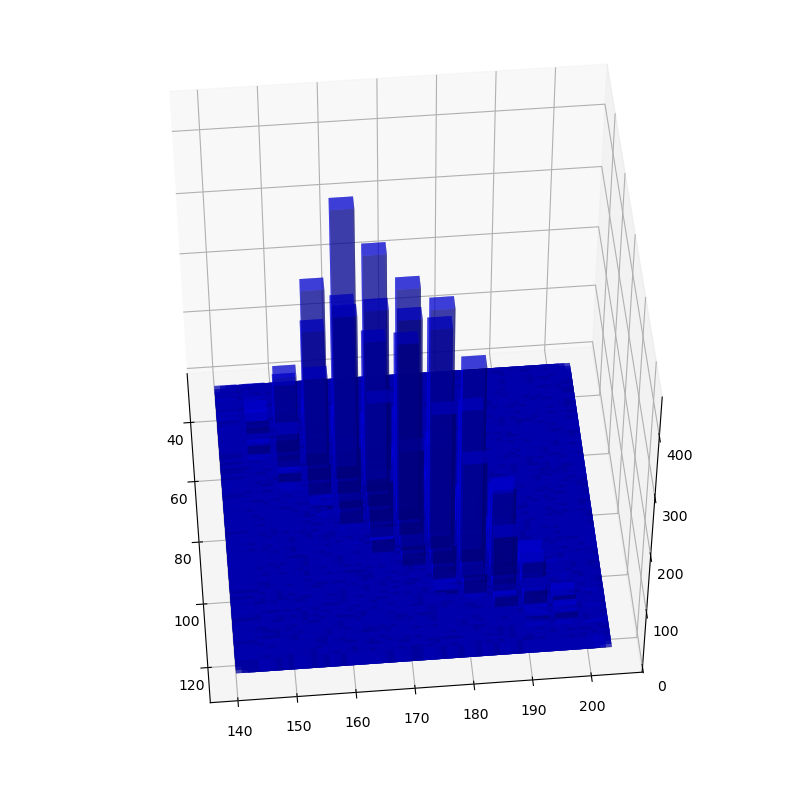

In [16]:
from helper import plot_joint_3d
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') # 111: 1 fila, 1 columna, 1 índice
conjunta_np = plot_joint_3d(frecuencia_conjunta, bins_width = 4, az=50, el=-5, ax=ax)
# conjunta_np es una matriz donde se indica la altura de cada barra del gráfico (indexado x=peso,y=altura)
plt.show()

El gráfico de arriba muestra la relación entre pesos y alturas, y los **pares de valores**  con mayor probabilidad de ocurrencia.

# Marginales y conjunta

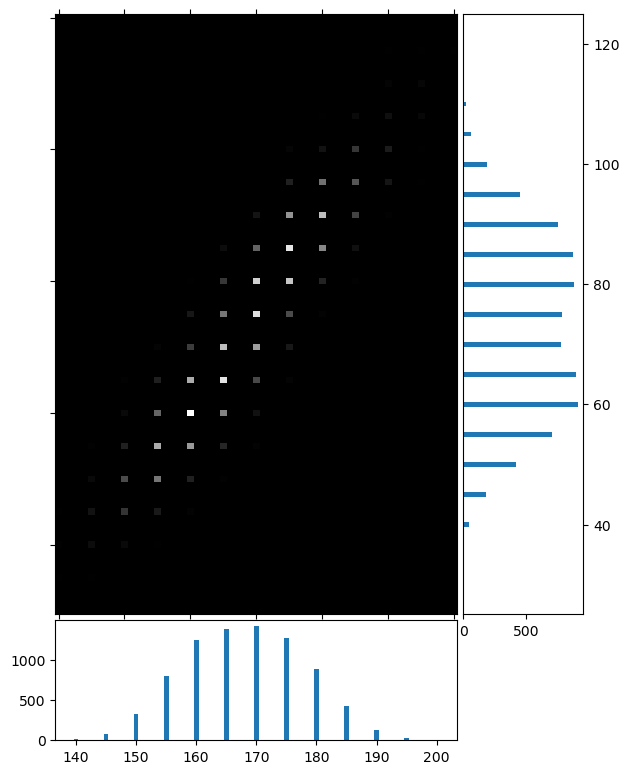

In [17]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frecuencia_conjunta)

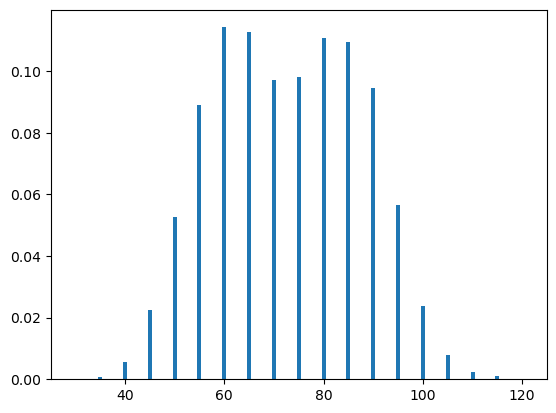

In [18]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

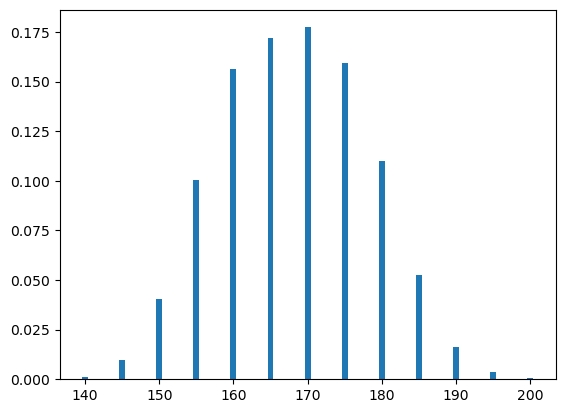

In [19]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

### Qué pasa si genero una muestra de pesos y altura a partir de las distribuciones anteriores, pero por separado? Tiene sentido?

Se puede observar que si bien el muestreo toma en cuenta la distribución de peso y altura, al tomar las probabilidades marginales (no toma la probabilidad conjunta), se está suponiendo que se trata de variables independientes, por lo que en varios casos los pares de valores generados no tendrán demasiada coherencia. Ej: Altura 150 y Peso 200

In [20]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 10000, p = list(peso_prob.values()))
print(peso_gen[:100])

[ 80  65  80  70  90  55  50 100  70  95  70  60  80  90  75  55  50  65
  85 100  50  95  90  90  80  90  60  75  85  85  90  70  70  90  70  55
  85  90  60  75  85  90  60 100  80  80  45  65  60  65 105  65  75  55
  65  80  90  65  95  75  90  75  60  70  85  95  80  70  95  70  75  95
  60  80  85  65  85  50  85  85  90  50  95  65  85  70  90  40 100  70
  65  80  65  60  40  70  80  70  75  80]


In [21]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 10000, p = list(altura_prob.values()))
print(alt_gen[:100])

[170 165 165 185 165 175 175 160 185 175 155 190 170 170 180 185 160 160
 180 175 180 150 185 185 165 170 170 160 185 165 165 185 165 160 150 150
 175 170 165 185 180 180 165 175 150 175 175 160 160 175 175 185 175 175
 150 165 170 150 170 155 185 170 165 185 185 170 170 165 170 185 165 170
 170 165 150 175 175 165 170 170 175 180 160 165 165 175 160 185 160 165
 175 160 170 160 180 190 165 160 165 180]


In [22]:
gen_from_marg = [(peso_gen[i], alt_gen[i]) for i in range(len(alt_gen))]

In [39]:
frec_gen_from_marg = dict(Counter(gen_from_marg))

In [53]:
# Quiero ver, para un peso de 100, qué valores de altura corresponden de acuerdo a los valores generados
for n,pair in enumerate(frec_gen_from_marg):
    if pair[0] == 100:
        print(f'{pair}: {frec_gen_from_marg[pair]}')

(100, 160): 47
(100, 175): 42
(100, 170): 45
(100, 165): 41
(100, 190): 6
(100, 180): 30
(100, 155): 19
(100, 185): 14
(100, 150): 9
(100, 145): 2
(100, 200): 1
(100, 195): 1


Se observa la poca coherencia de valores. Ejemplo: Peso de 100 kg y altura de 1,55 m

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(frec_gen_from_marg, bins_width = 4, az=50, el=-5, ax=ax)

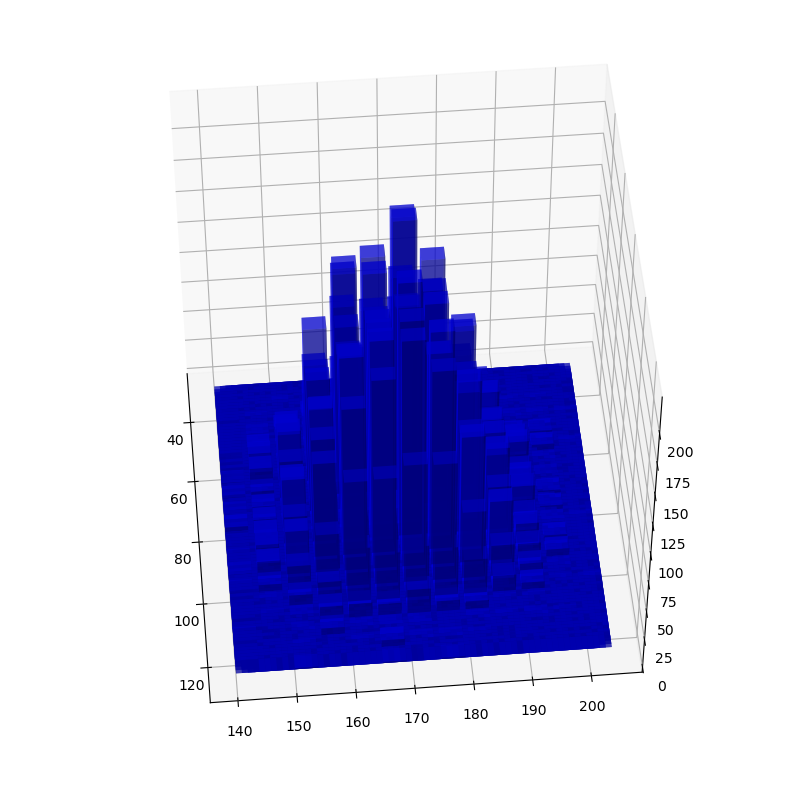

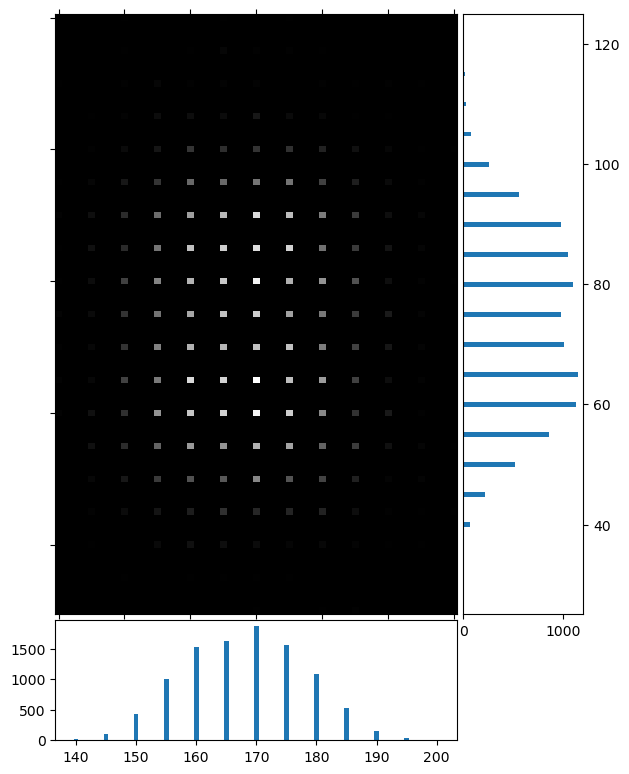

In [25]:
conjunta_np, p_min, a_min = plot_joint_hists_dicts(frec_gen_from_marg)

Se ve claramente que la forma de la distribución es muy distinta a la distribución de la conjunta

# Como podríamos generar?

In [26]:
items = list(conjunta_prob.items())
print(items)

[((60, 160), 0.056625), ((95, 180), 0.025125), ((75, 170), 0.04925), ((55, 160), 0.034), ((55, 150), 0.007375), ((80, 175), 0.043875), ((70, 170), 0.034875), ((55, 155), 0.03775), ((85, 180), 0.029875), ((60, 165), 0.029375), ((80, 165), 0.01225), ((95, 185), 0.019125), ((75, 165), 0.026125), ((65, 170), 0.016), ((65, 160), 0.038125), ((40, 150), 0.002), ((40, 145), 0.00275), ((70, 160), 0.0135), ((65, 165), 0.05025), ((85, 170), 0.022), ((85, 165), 0.002875), ((50, 155), 0.026), ((90, 175), 0.03275), ((30, 145), 0.000125), ((45, 150), 0.011625), ((60, 155), 0.022375), ((90, 170), 0.0045), ((90, 180), 0.041875), ((110, 195), 0.001375), ((85, 185), 0.00375), ((65, 155), 0.006875), ((85, 175), 0.051), ((70, 165), 0.042125), ((60, 170), 0.003875), ((60, 150), 0.002), ((90, 190), 0.000625), ((100, 185), 0.012125), ((45, 155), 0.00575), ((50, 150), 0.016625), ((105, 185), 0.00225), ((80, 170), 0.046125), ((35, 145), 0.000375), ((95, 175), 0.00725), ((50, 160), 0.0075), ((75, 175), 0.01675),

In [27]:
len(items)

88

In [29]:
# Genero valores entre 0 y 88, con la probabilidad de la conjunta. Luego uso esos valores para indexar a items y así tengo mi muestreo.
data_indexes = np.random.choice(88, size = 10000, p = [x[1] for x in items])


In [30]:
generates_data = []
for i in data_indexes:
    generates_data.append(items[i][0])

In [31]:
gen_frec = dict(Counter(generates_data))

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
conjunta_np = plot_joint_3d(gen_frec, bins_width = 4, az=50, el=-5, ax=ax)

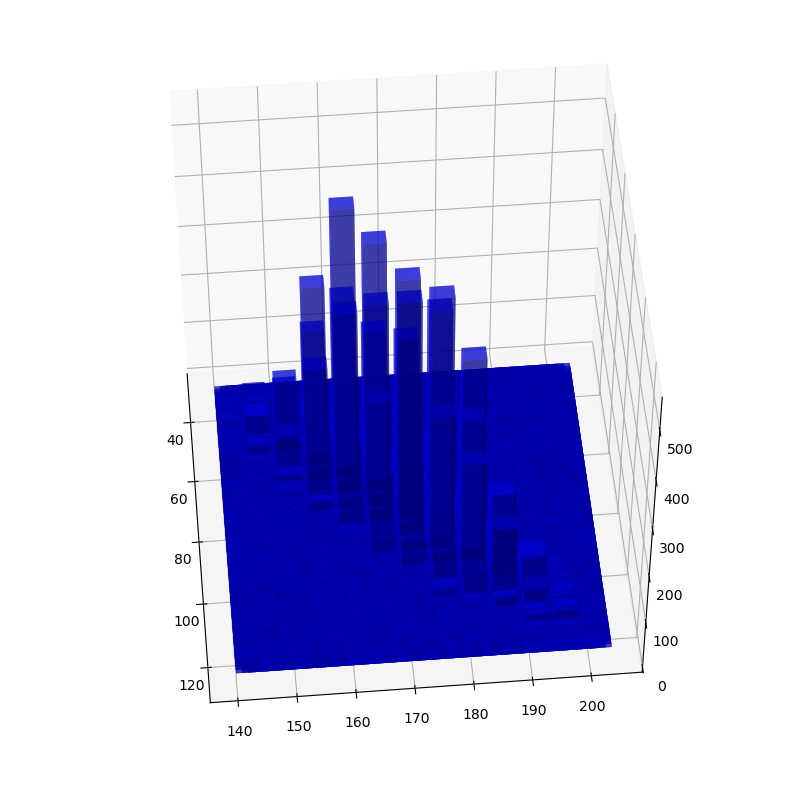

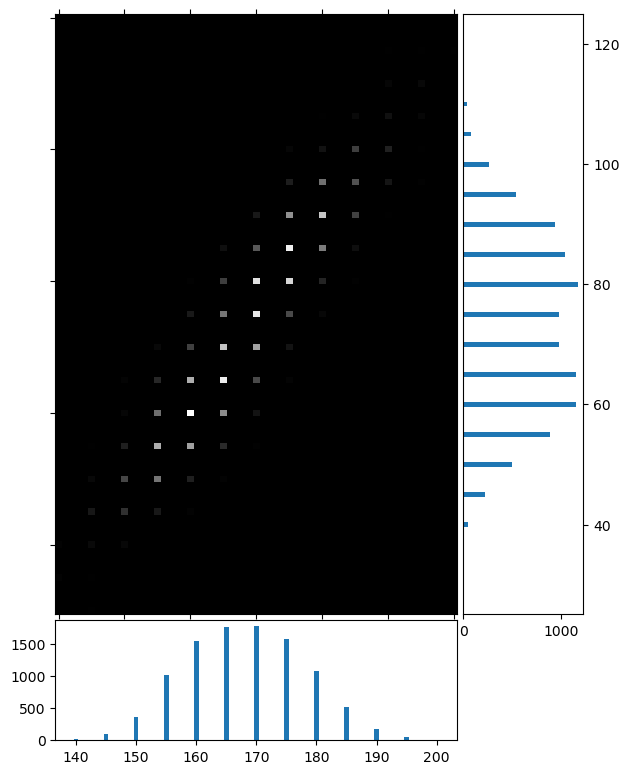

In [33]:
from helper import plot_joint_hists_dicts
conjunta_np, p_min, a_min = plot_joint_hists_dicts(gen_frec)